# Explanation of Gini

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pydotplus import graph_from_dot_data
from mlxtend.plotting import plot_decision_regions

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text

### Load Data 

In [2]:
df = pd.read_csv('shows.csv')
df.shape

(13, 5)

In [3]:
df.head(2)

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO


Data should be in numerical form to make a decision tree. Do the transformations.

In [4]:
df['Nationality'] = df['Nationality'].map({'UK': 0, 'USA': 1, 'N': 2})
df['Go'] = df['Go'].map({'YES': 1, 'NO': 0})

In [5]:
X = df[['Age', 'Experience', 'Rank', 'Nationality']]
y = df['Go']
feature_names = X.columns
X = X.values
y = y.values
y

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

### Model

In [6]:
dtree = DecisionTreeClassifier(random_state=47)
dtree.fit(X, y)

DecisionTreeClassifier(random_state=47)

In [7]:
print(export_text(dtree, feature_names=list(feature_names), show_weights=True))

|--- Rank <= 6.50
|   |--- weights: [5.00, 0.00] class: 0
|--- Rank >  6.50
|   |--- Nationality <= 0.50
|   |   |--- Age <= 35.50
|   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |--- Age >  35.50
|   |   |   |--- Age <= 40.50
|   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- Age >  40.50
|   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |--- Nationality >  0.50
|   |   |--- weights: [0.00, 4.00] class: 1



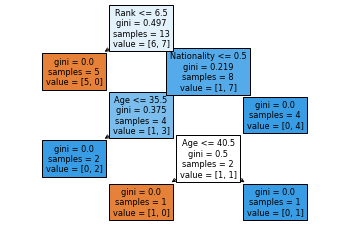

In [8]:
plot_tree(dtree, feature_names=feature_names, filled=True)
plt.show()

In [9]:
# uncomment code below if graphviz is not installed on your system.
# ! brew install graphviz

In [10]:
dot_data = export_graphviz(dtree,
                           filled=True, 
                           rounded=True,
                           class_names=list(map(str, y)),
                           feature_names=feature_names,
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')

True

## Graph Explanation

Gini formula:

> Gini = 1 - (x/n)2 - (y/n)2

Where 

- x is the number of positive answers("GO"), 
- y is the number of negative answers ("NO")
- n is the number of samples



### 1. Rank

For the root node:

1 - (7 / 13)2 - (6 / 13)2 = 0.497

Follow from [W3Schools](https://www.w3schools.com/python/python_ml_decision_tree.asp).